# Cone danger

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

plt.style.use('./arena.mplstyle')

In [2]:
# Model configuration
model = "llama-3.3-70b"  # Options: "llama-3.3-70b", "qwen-3-32b", "gemma-2-27b"
layer = 40

# Display settings
model_display = model.replace('-', ' ').title()
base_dir = f"/workspace/{model}"

In [4]:
# Load aggregated jailbreak scores
df = pd.read_json(f"{base_dir}/evals/two_turn/jailbreak_prefills_scores_aggregated.jsonl", lines=True)
df.sort_values(by="prefill_id", inplace=True, ascending=True)

# Calculate correlations
pearson_r, pearson_p = pearsonr(df["pc1"], df["harm_rate"])
spearman_r, spearman_p = spearmanr(df["pc1"], df["harm_rate"])

print(f"Pearson r = {pearson_r:.3f}, p = {pearson_p:.2e}")
print(f"Spearman r = {spearman_r:.3f}, p = {spearman_p:.2e}")

Pearson r = 0.413, p = 1.80e-113
Spearman r = 0.354, p = 7.23e-82


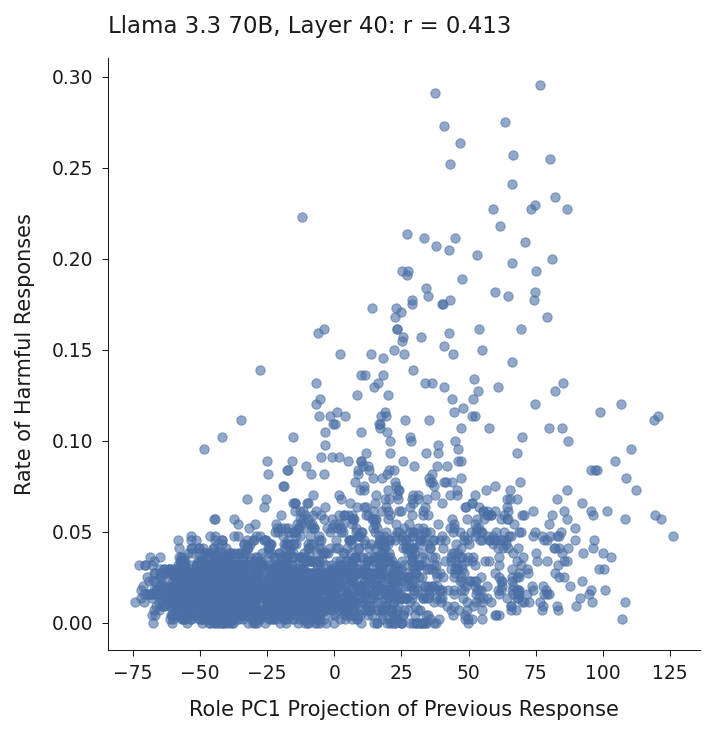

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(
    df["pc1"],
    df["harm_rate"],
    alpha=0.6,
    s=20,
    color='#4a6fa5'
)

ax.set_xlabel("Role PC1 Projection of Previous Response")
ax.set_ylabel("Rate of Harmful Responses")
ax.set_title(f"{model_display}, Layer {layer}: r = {pearson_r:.3f}")

ax.set_box_aspect(1)

plt.tight_layout()
plt.show()